In [33]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [7]:
train = pd.read_csv('/home/mohit/Music/Kaggal/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/home/mohit/Music/Kaggal/house-prices-advanced-regression-techniques/test.csv')

In [8]:
train.shape

(1460, 81)

In [9]:
test.shape

(1459, 80)

In [10]:
plt.style.use(style='ggplot')
plt.rcParams["figure.figsize"]=(10,8)

In [11]:
train.SalePrice.skew()

1.8828757597682129

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

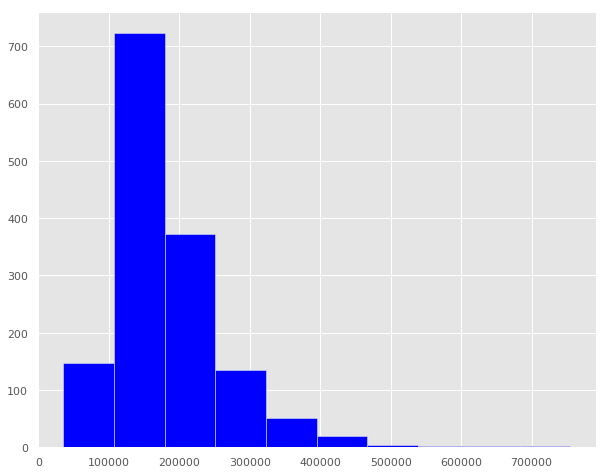

In [12]:
plt.hist(train.SalePrice,color='blue')


 Skew is : 0.12133506220520406


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

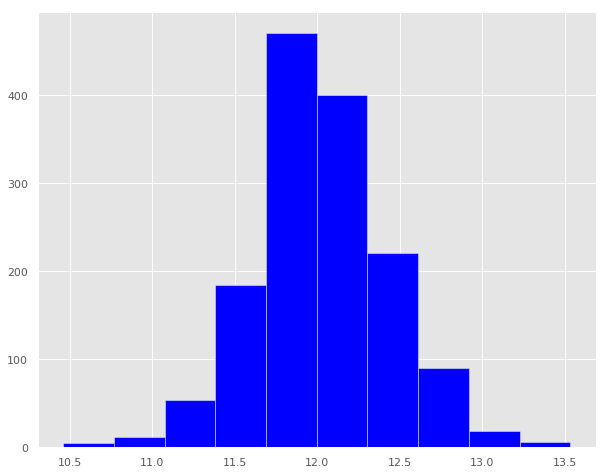

In [13]:
target=np.log(train.SalePrice)
print("\n Skew is :",target.skew())
plt.hist(target,color='blue')

In [14]:
numeric_features=train.select_dtypes(include=[np.number])

In [15]:
corr=numeric_features.corr()

In [16]:
print(corr)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [17]:
print(corr['SalePrice'].sort_values(ascending=False)[:10])


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


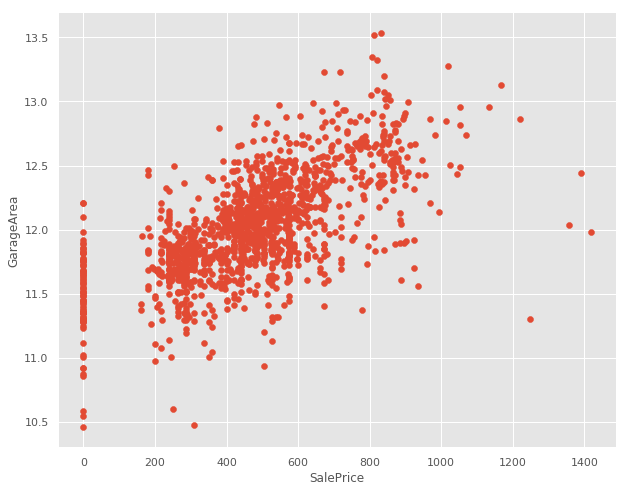

In [18]:
plt.scatter(x=train['GarageArea'],y=target)
plt.xlabel('SalePrice')
plt.ylabel('GarageArea')
plt.show()

In [19]:
train=train[train['GarageArea']<1200]

In [21]:
categorical=train.select_dtypes(exclude=np.number)

In [24]:
categorical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [26]:
train['En_Street']=pd.get_dummies(train.Street,drop_first=True)
test['En_Street']=pd.get_dummies(test.Street,drop_first=True)
print(train.En_Street.value_counts())


1    1450
0       5
Name: En_Street, dtype: int64


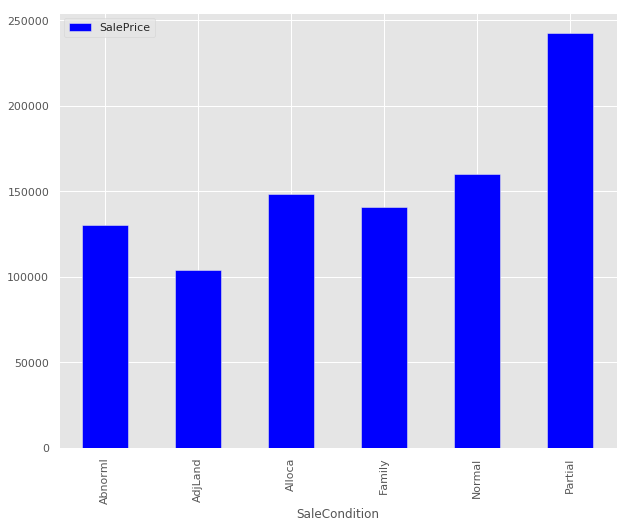

In [28]:
condition_pivot=train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
condition_pivot.plot(kind='bar',color='blue')

In [29]:
def encode(x): return 1 if x=='Partial' else 0

train['en_condtion']=train.SaleCondition.apply(encode)
test['en_condtion']=test.SaleCondition.apply(encode)

In [30]:
data=train.select_dtypes(include=[np.number]).interpolate().dropna()

In [31]:
y=np.log(train.SalePrice)
x=data.drop(['SalePrice','Id'],axis=1)

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [43]:
model=lr.fit(x_train,y_train)
print("R^2 is :\n",model.score(x_test,y_test))


R^2 is :
 0.858287675980267


In [44]:
prediction=model.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error
print("RMSE is :\n",mean_squared_error(y_test,prediction))

RMSE is :
 0.019619585831350796


In [53]:
actual_values=y_test

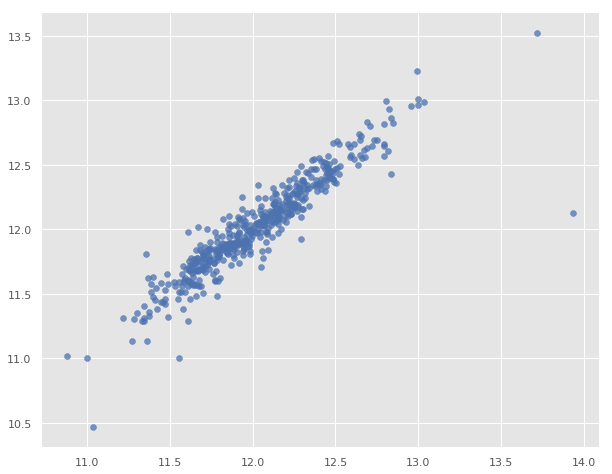

In [54]:
plt.scatter(prediction,actual_values,alpha=0.75,color='b')
plt.xlabel("Predicted_values")
plt.ylabel("Actual_Values")
plt.title("Linear regression model")